# Import des modules nécessaires

## Modules externes

In [2]:
# pour faire de beaux graphiques
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

# pour gérer les tables en Python
import pandas as pd

# pour faire d'encore plus beaux graphiques
import seaborn as sns

from sqlalchemy import desc, or_

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

## Modules internes

In [3]:
from db import Arret, Etape, Ligne, Session, Trajet

# Récupérer les données (écarts, déjà)

In [4]:
session = Session()

ecarts = [req[0] for req in session.query(Etape.ecart).all()]

session.close()

In [6]:
print(ecarts)

[239, 34, 937, 155, 209, -13, 208, 54, 650, 204, 1147, -125, 522, 51, 25, 46, -203, 0, 0, 0, 0, 36, -128, -8, 156, 53, 244, 212, 220, -256, 159, 31, 10, 649, 15, 0, 0, 0, 0, 53, 147, 130, 52, 645, 919, 0, 342, 201, 847, -734, -250, -128, 0, 0, 0, 0, 0, 10, 231, 537, 1, 343, 1222, 15, 343, -2, -125, -352, 56, 235, 45, 27, 35, -40, 47, -134, 133, 16, 230, -34, 56, 525, 0, 0, 0, 0, 0, 218, -46, 159, 220, 111, 210, 329, -17, -227, -19, 5, 127, 0, 0, 0, 0, -618, 33, 39, 413, -323, 20, -128, 104, 6, 20, -57, -44, 132, 214, -153, -20, 300, -122, 49, -112, 56, 612, 226, 0, 2, 127, 0, 0, 0, 0, -615, -5, -38, 13, 9, 654, 233, 0, 59, 10633, 126, 0, 45, 6, -41, 14, -13, -12, 151, -305, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3811, -112, 56, -23, -16, 200, -204, 0, -27, 37, -40, -1155, -33, -352, 254, 219, -713, 0, -17, 109, 145, 445, 239, 42, 0, 0, 0, 0, 0, 0, 551, -100, -131, 130, -52, 108, -143, -352, 106, 33, 355, 120, -124, 59, -209, 51, -440, -127, -5, -145, -117, 311, 111, -125, -300, 0, -11, 0, -233, -1

# Analyse

Je vous donne quelques pistes. L'idée est d'essayer de trouver un indicateurs qui vous semble refléter la qualité de l'exploitation du réseau à cet instant, à partir de tous les écarts des bus.

Pour plus de graphiques et d'analyses statistiques, je vous conseille d'aller voir [le site de `seaborn`](https://seaborn.pydata.org/examples/).

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6448: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



[Text(0,0.5,'nombre de véhicules'),
 Text(0.5,0,'retard en secondes'),
 Text(0.5,1,'Quels retards sur le réseau Irigo ?')]

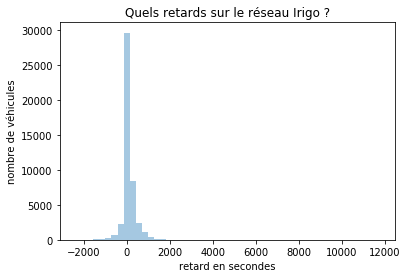

In [7]:
ax = sns.distplot(ecarts, kde=False)

ax.set(
    title="Quels retards sur le réseau Irigo ?",
    xlabel='retard en secondes',
    ylabel='nombre de véhicules'
)

Maintenant essayez de l'afficher en minutes.

Puis, réfléchissez à quel nombre pourrait refléter, en résumé, la situation : le max des retards ? la moyenne des retards ? la moyenne des valeurs absolues des retards ?

# Récupérer toutes les données

In [6]:
# Voici comment on fait un join
query = session.query(Trajet, Etape.ecart)\
               .select_from(Etape).join(Trajet)

pd.read_sql_query(query.statement, query.session.bind)

,id_trajet,id_vehicule,id_ligne,latitude,longitude,destination,ecart
0,0,268444862,268435485,47.463119,-0.565200,TEST NOIR,0
1,1,268435881,268435465,47.496834,-0.514922,ESPACE ANJOU,0
2,2,268435879,268435468,47.433680,-0.500799,ST AUBIN LA SALLE,0
3,3,268435987,268435461,47.493527,-0.565450,CIRCULAIRE SENS A,0
4,4,268436137,268435457,47.478642,-0.605691,MONPLAISIR,0
5,5,268435884,268435463,47.530214,-0.596968,CHU - HOPITAL,29
6,6,268435657,268435457,47.473377,-0.529915,MONPLAISIR,249
7,7,268435899,268435461,47.454208,-0.527623,CIRCULAIRE SENS A,305
8,8,268435910,268435464,47.483450,-0.563878,HAUTE DE RECULEE,219
9,9,268435994,268435465,47.496057,-0.515040,EVENTARD par MONPLAISIR,51


Et si je veux relier ça à la ligne elle-même ? J'ai en quelque sorte besoin de jointures en chaine Etape <-> Trajet <-> Ligne. C'est pas plus compliqué !

In [7]:
# Voici comment on fait un join
query = session.query(Etape.ecart, Ligne.nom_ligne) \
               .select_from(Etape).join(Trajet).join(Ligne)

df = pd.read_sql_query(query.statement, query.session.bind)

df

,ecart,nom_ligne
0,0,EXPRESS CHANTOURTEAU <> GARES
1,0,ESPACE ANJOU <> EVENTARD
2,0,M-MARCILLE <> ST AUBIN LA SALLE
3,0,CIRCULAIRE VERNEAU GARE EUROPE
4,0,BELLE BEILLE <> MONPLAISIR
5,29,HOPITAL <> MONTREUIL JUIGNE
6,249,BELLE BEILLE <> MONPLAISIR
7,305,CIRCULAIRE VERNEAU GARE EUROPE
8,219,PONTS CE <> AQUAVITA H. RECULEE
9,51,ESPACE ANJOU <> EVENTARD


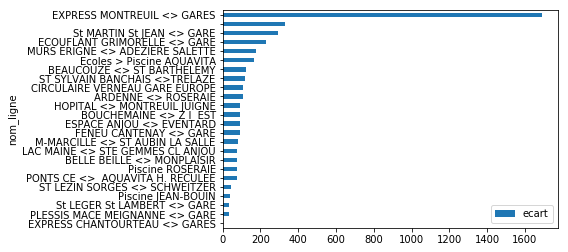

In [8]:
dft = df.pivot_table(index="nom_ligne", values="ecart",
               aggfunc=lambda x: np.mean(np.abs(x))) \
  .sort_values(by="ecart")

dft.plot.barh()

In [9]:
dft

,ecart
nom_ligne,
EXPRESS CHANTOURTEAU <> GARES,0.000000
PLESSIS MACE MEIGNANNE <> GARE,31.333333
St LEGER St LAMBERT <> GARE,35.333333
Piscine JEAN-BOUIN,38.333333
ST LEZIN SORGES <> SCHWEITZER,45.666667
PONTS CE <> AQUAVITA H. RECULEE,74.600000
Piscine ROSERAIE,76.000000
BELLE BEILLE <> MONPLAISIR,76.928571
LAC MAINE <> STE GEMMES CL ANJOU,77.952381


In [10]:
trace = go.Bar(
    y=dft.index,
    x=dft['ecart'],
    orientation='h',
    marker={
        'color': 'rgba(210, 105, 30, 0.5)'
    }
)

layout = go.Layout(
    title="Ecarts absolus moyens sur les lignes du réseau Irigo",
    xaxis={
        'title': "écart moyen absolu (secondes)",
    },
    yaxis={
        'title': "ligne"
    },
    margin={
        'l': 300
    }
)

figure = go.Figure(
    data=go.Data([trace]),
    layout=layout
)

iplot(figure)

In [11]:
# requête pour voir les vehicules en avance et en retard de plus de 10 minutes
query = session.query(Etape.ecart, Ligne.nom_ligne, Trajet.destination, Arret.nom_arret) \
               .select_from(Etape).join(Trajet).join(Ligne).join(Arret) \
               .filter(
                   or_(
                       Etape.ecart < -600,
                       Etape.ecart > 600
                   )
               ).order_by(desc(Etape.ecart))

dft = pd.read_sql_query(query.statement, query.session.bind)
dft

,ecart,nom_ligne,destination,nom_arret
0,4215,EXPRESS MONTREUIL <> GARES,TEST NOIR,DEPOT VOISIN
1,3846,EXPRESS MONTREUIL <> GARES,TEST NOIR,DEPOT VOISIN
2,3827,EXPRESS MONTREUIL <> GARES,TEST NOIR,DEPOT VOISIN
3,1226,EXPRESS MONTREUIL <> GARES,TEST NOIR,DEPOT VOISIN
4,841,EXPRESS MONTREUIL <> GARES,TEST NOIR,DEPOT VOISIN
5,822,EXPRESS MONTREUIL <> GARES,TEST NOIR,DEPOT VOISIN


# Retards en fonction du temps

In [9]:
from sqlalchemy import desc, func

In [16]:
query = session.query(func.avg(Etape.ecart).label("ecart"), Etape.record_timestamp) \
               .group_by(Etape.record_timestamp) \
               .order_by(desc(Etape.record_timestamp))

dft = pd.read_sql_query(query.statement, query.session.bind)

dft.set_index('record_timestamp', inplace=True)

dft = dft.resample('15T').mean()

dft.info()

dft.sample(3)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2018-06-21 16:15:00 to 2018-06-22 06:45:00
Freq: 15T
Data columns (total 1 columns):
ecart    39 non-null float64
dtypes: float64(1)
memory usage: 944.0 bytes


,ecart
record_timestamp,
2018-06-22 04:15:00,70.644815
2018-06-21 17:00:00,159.206518
2018-06-22 04:00:00,24.301832


In [18]:
data = [go.Scatter(x=dft.index, y=dft['ecart'])]

iplot(data)